In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
np.random.seed(0)

In [4]:
n_data = 60

In [5]:
# 学習意欲（X）
X = np.random.uniform(0, 100, n_data)

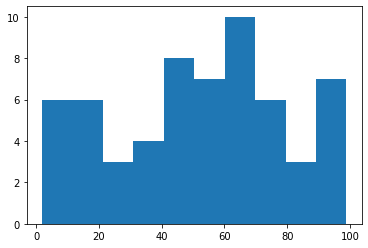

In [10]:
plt.hist(X)
plt.show()

In [11]:
# 特別講習の受講のフラグ（D）
D_noise = np.random.uniform(-20, 20, n_data)
D = np.where(X+D_noise > 50, 1, 0)

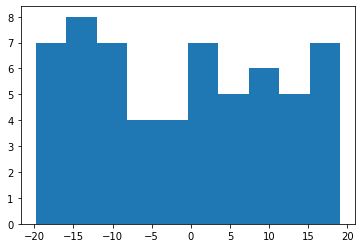

In [14]:
plt.hist(D_noise)
plt.show()

In [13]:
D # １：介入あり、２：介入なし

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0])

In [19]:
# 試験の得点（Y）
treatment = np.random.uniform(10, 30, n_data)
Y_noise = np.random.normal(0, 10, n_data)
Y = np.clip(0.5*X + treatment*D + Y_noise, 0, 100).astype(int)

In [20]:
Y

array([38, 50, 52, 15, 16, 57, 44, 59, 76, 22, 43, 30, 57, 66,  0,  0,  0,
       53, 44, 63, 73, 68, 32, 71,  5, 52,  5, 57, 45, 20, 16, 47, 31, 40,
        1, 35, 49, 15, 57, 42,  0, 25, 30,  0, 56, 36,  0,  0, 32, 35, 49,
       42, 60,  0,  7,  0, 62, 24, 62, 20])

In [21]:
# 介入なしのスコア
Y_control = np.clip(0.5*X + Y_noise, 0, 100).astype(int)

In [22]:
Y_control

array([38, 31, 23, 15, 16, 29, 18, 46, 53, 22, 31, 12, 42, 39,  0,  0,  0,
       36, 34, 49, 55, 39, 32, 42,  5, 33,  5, 43, 23,  9, 16, 28, 31, 25,
        1, 35, 37, 15, 45, 42,  0, 25, 12,  0, 33, 16,  0,  0, 32, 19, 34,
       19, 45,  0,  7,  0, 41, 24, 37, 20])

In [23]:
# 介入ありのスコア
Y_treatment = np.clip(0.5*X + treatment + Y_noise, 0, 100).astype(int)

In [24]:
Y_treatment

array([65, 50, 52, 36, 43, 57, 44, 59, 76, 40, 43, 30, 57, 66,  7, 28,  0,
       53, 44, 63, 73, 68, 44, 71, 33, 52, 21, 57, 45, 20, 26, 47, 42, 40,
       15, 50, 49, 25, 57, 65, 30, 55, 30,  6, 56, 36, 30,  3, 57, 35, 49,
       42, 60, 12, 27, 18, 62, 39, 62, 39])

In [26]:
df = pd.DataFrame({
    "学習意欲 X": X,
    "介入フラグ D": D,
    "得点 Y": Y,
    "得点(介入あり) Y_treatment": Y_treatment,
    "得点(介入なし) Y_control": Y_control
})

In [28]:
df.head(3)

,学習意欲 X,介入フラグ D,得点 Y,得点(介入あり) Y_treatment,得点(介入なし) Y_control
0,54.881350,0,38,65,38
1,71.518937,1,50,50,31
2,60.276338,1,52,52,23


In [29]:
df["介入フラグ D"].value_counts()

1    33
0    27
Name: 介入フラグ D, dtype: int64

In [30]:
df.describe()

,学習意欲 X,介入フラグ D,得点 Y,得点(介入あり) Y_treatment,得点(介入なし) Y_control
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,51.641326,0.550000,34.766667,42.683333,24.316667
std,27.672837,0.501692,23.150478,18.358475,15.964464
min,1.878980,0.000000,0.000000,0.000000,0.000000
25%,30.271017,0.000000,15.750000,30.000000,12.000000
50%,54.684834,1.000000,37.000000,44.000000,25.000000
75%,70.202074,1.000000,53.750000,57.000000,37.000000
max,98.837384,1.000000,76.000000,76.000000,55.000000


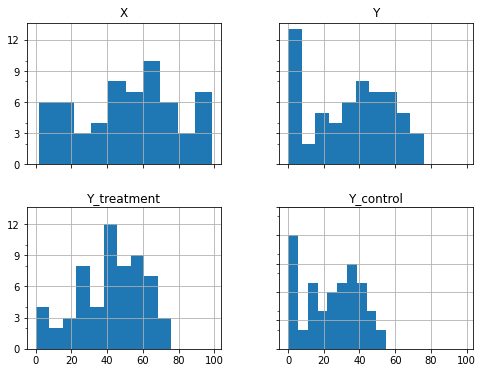

In [35]:
df[
    [
        "学習意欲 X",
        "得点 Y",
        "得点(介入あり) Y_treatment",
        "得点(介入なし) Y_control"
    ]
].rename(columns={
    "学習意欲 X": "X",
    "得点 Y": "Y",
    "得点(介入あり) Y_treatment": "Y_treatment",
    "得点(介入なし) Y_control": "Y_control"
}).hist(figsize=(8, 6), sharex=True, sharey=True)
plt.xticks(np.arange(0, 110, 20))
plt.yticks(np.arange(0, 16, 3))
plt.show()

学習意欲 $ X $ と試験の成績 $ Y $ の分布が似ていることから

$ Y_{control} \leq Y \leq Y_{treatment} $

の傾向が見える。